In [ ]:
install.packages('tidyverse')

In [ ]:
library(haven)
library(dplyr)
library(ggplot2)

In [231]:
plt.raw <- function(d) {
    d %>%
        ggplot(aes(x=earn, colour= factor(f))) + 
        geom_density(adjust=1.5) + 
        xlim(0, 10000) + 
        theme(legend.position="bottom", legend.direction="vertical")
}

plt.log <- function(d) {
    d %>%
        ggplot(aes(x=log(earn), colour= factor(f))) + 
        geom_density(adjust=2) + 
        xlim(4, 12) + 
        theme(legend.position="bottom", legend.direction="vertical")
}

pick.companies <- function(d, min=0, max=99999999) {
    d %>%
        filter(hours_m > 20) %>%
        group_by(tempsiz, ind) %>% 
        filter(n() > min & n() < max & !is.na(occ)) %>% 
        ungroup() %>% 
        mutate(f = interaction(as_factor(tempsiz), as_factor(ind)))
}

In [189]:
d <- read_dta('.dat/08/set_d.dta')

Warning message:
“Removed 23323 rows containing non-finite values (stat_density).”

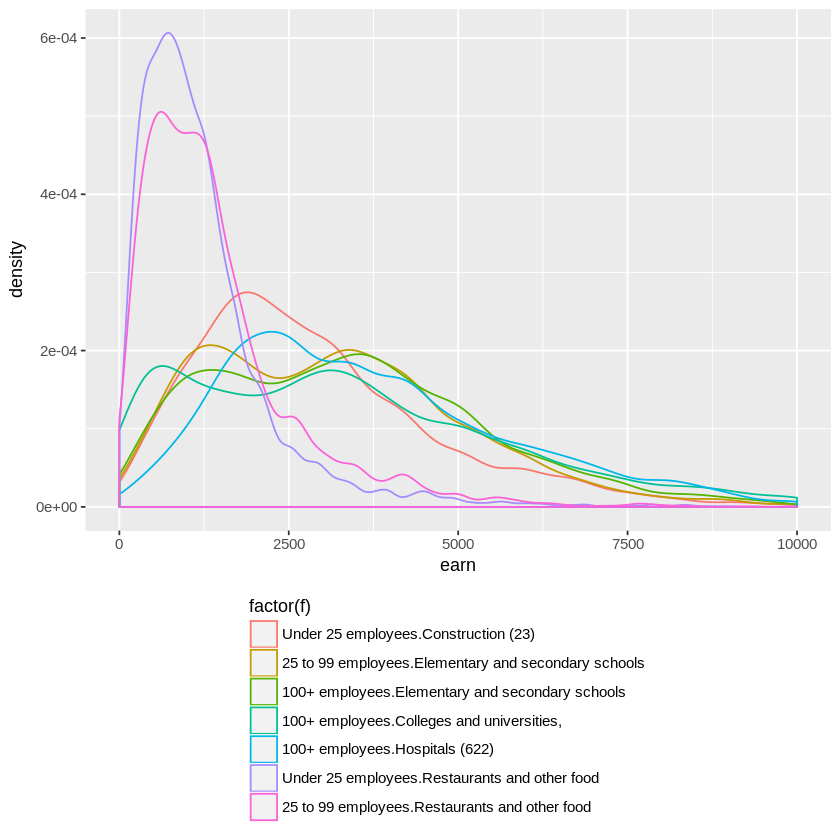

In [227]:
pick.companies(d, 20000) %>% plt.raw()

Warning message:
“Removed 19397 rows containing non-finite values (stat_density).”

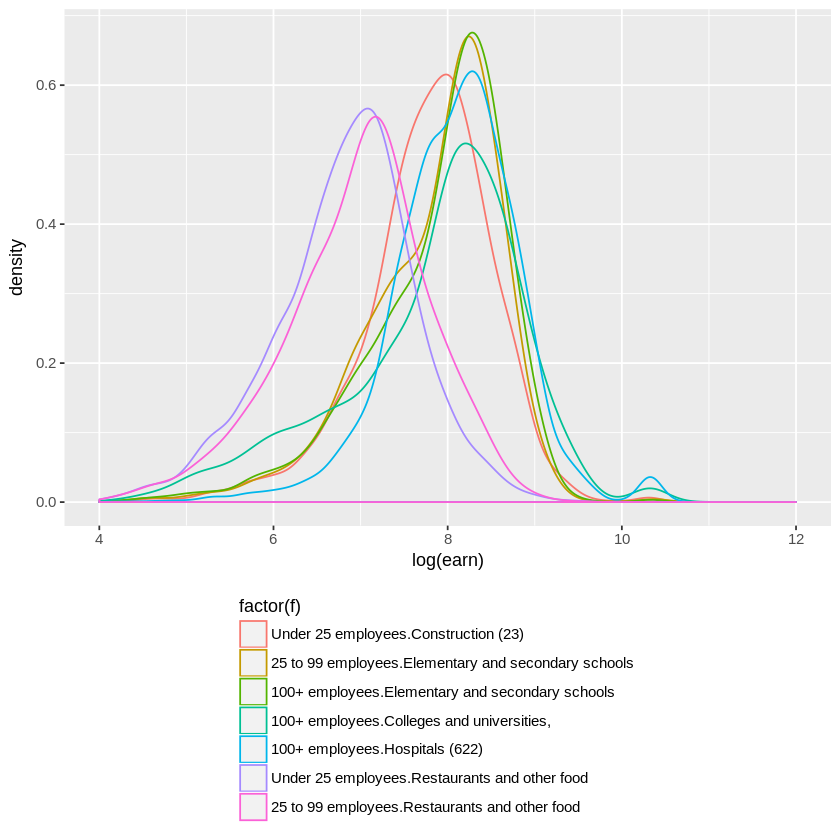

In [232]:
pick.companies(d, 20000) %>% plt.log()

Warning message:
“Removed 7349 rows containing non-finite values (stat_density).”

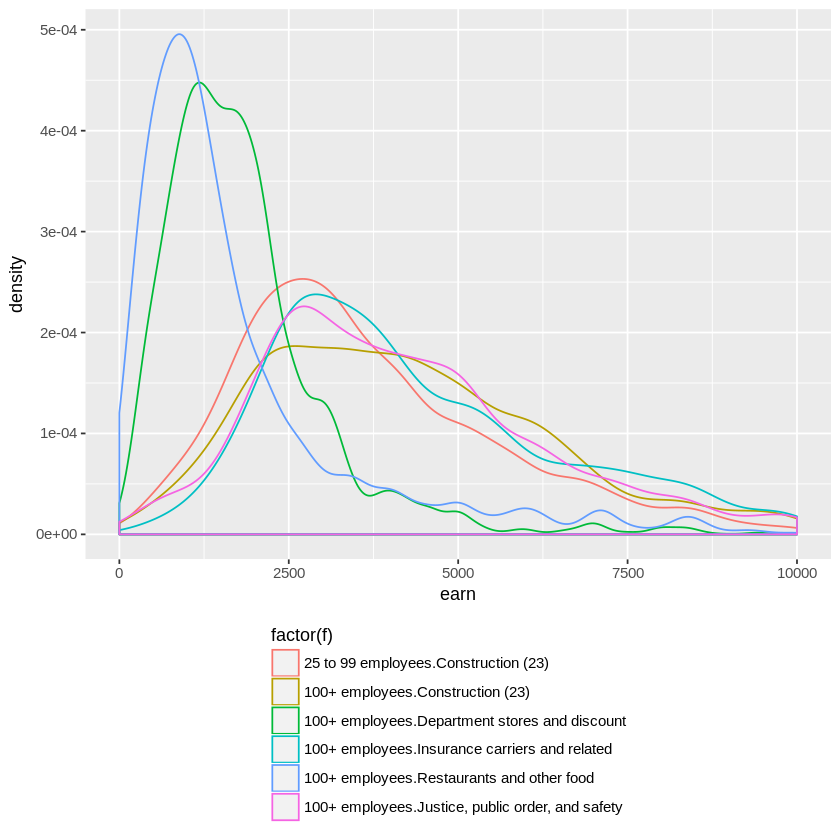

In [229]:
pick.companies(d, 12000, 20000) %>% plt.raw()

Warning message:
“Removed 4849 rows containing non-finite values (stat_density).”

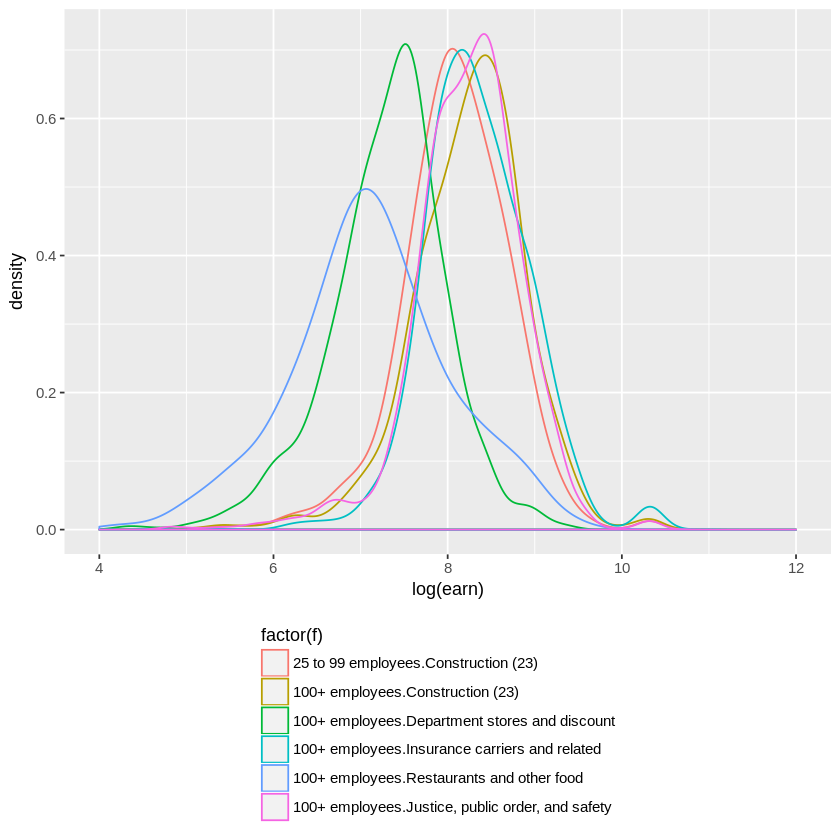

In [233]:
pick.companies(d, 12000, 20000) %>% plt.log()